## Generar 300 números aleatorios

In [2]:
import pandas as pd
from random import random, randint

# 300 datos
datos = [str(randint(10000,99999)) for i in range(0,300)]

## Clasificar números generados

In [3]:
def patron(num):
    iguales = -5
    for i in range(0, 5):
        char1 = num[i]
        for j in range(0, 5):
            char2 = num[j]
            if char1 == char2:
                iguales = iguales+1
    
    return iguales

# aplicar la funcion `patron` a cada elemento de la lista `datos`
clasificacion = list(map(patron, datos))

data = pd.DataFrame({'Número': datos, 'Clasificación': clasificacion})

data.head()

,Clasificación,Número
0,2,25812
1,0,36120
2,2,52426
3,6,32922
4,0,15340


## Histograma

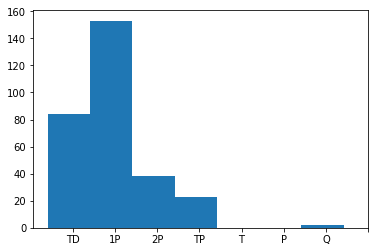

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

freq, bins, _ = plt.hist(data['Clasificación'], bins=7)

locs, labels = xticks()

ticks = xticks(bins+1, ('TD', '1P', '2P', 'TP', 'T', 'P', 'Q'))

## Probabilidades, frecuencias esperadas y observadas 

In [11]:
tabla = pd.DataFrame()

cat = [
        'Todos diferentes (TD)', 
        'Exactamente un par (1P)', 
        'Dos pares (2P)',
        'Una tercia y un par (TP)',
        'Tercia (T)',
        'Póker (P)',
        'Quintilla (Q)'
]

probs = [.3024, .5040, .1080, .0090, .0720, .0045, .0001]
freq_esperada = [round(300*p, 4) for p in probs]

tabla['Categorías'] = cat
tabla['Frecuencia observada'] = freq
tabla['Probabilidad'] = probs
tabla['Frecuencia esperada'] = freq_esperada

tabla

,Categorías,Frecuencia observada,Probabilidad,Frecuencia esperada
0,Todos diferentes (TD),84.0,0.3024,90.72
1,Exactamente un par (1P),153.0,0.5040,151.20
2,Dos pares (2P),38.0,0.1080,32.40
3,Una tercia y un par (TP),23.0,0.0090,2.70
4,Tercia (T),0.0,0.0720,21.60
5,Póker (P),0.0,0.0045,1.35
6,Quintilla (Q),2.0,0.0001,0.03


## Agrupar

In [20]:
tabla['Agrupar >=5'] = ''
tabla.loc[3, 'Agrupar >=5'] = tabla.loc[2, 'Frecuencia esperada'] + tabla.loc[3, 'Frecuencia esperada']

tabla.loc[6, 'Agrupar >=5'] = tabla.loc[4, 'Frecuencia esperada'] + tabla.loc[5, 'Frecuencia esperada'] + tabla.loc[6, 'Frecuencia esperada'] + tabla.loc[6, 'Frecuencia esperada']
tabla

,Categorías,Frecuencia observada,Probabilidad,Frecuencia esperada,Agrupar >=5
0,Todos diferentes (TD),84.0,0.3024,90.72,
1,Exactamente un par (1P),153.0,0.5040,151.20,
2,Dos pares (2P),38.0,0.1080,32.40,
3,Una tercia y un par (TP),23.0,0.0090,2.70,35.1
4,Tercia (T),0.0,0.0720,21.60,
5,Póker (P),0.0,0.0045,1.35,
6,Quintilla (Q),2.0,0.0001,0.03,23.01


## Calcular chi cuadrada

In [47]:
o = list(tabla['Frecuencia observada'][[0,1]])
o.insert(2,(sum(tabla['Frecuencia observada'][[2,3]])))
o.insert(3,(sum(tabla['Frecuencia observada'][[4,5,6]])))

e = list(tabla['Frecuencia esperada'][[0,1]])
e.insert(2, (tabla['Agrupar >=5'][3]))
e.insert(3, (tabla['Agrupar >=5'][6]))

chi = []
for i in range(0,4):
    chi.append(((o[i] - e[i])**2)/e[i])

chi_cal = sum(chi)

chi.insert(2, '')
chi.insert(4, '')
chi.insert(5, '')    

tabla['Chi cuadrada'] = chi

tabla

,Categorías,Frecuencia observada,Probabilidad,Frecuencia esperada,Agrupar >=5,Chi cuadrada
0,Todos diferentes (TD),84.0,0.3024,90.72,,0.497778
1,Exactamente un par (1P),153.0,0.5040,151.20,,0.0214286
2,Dos pares (2P),38.0,0.1080,32.40,,
3,Una tercia y un par (TP),23.0,0.0090,2.70,35.1,19.1114
4,Tercia (T),0.0,0.0720,21.60,,
5,Póker (P),0.0,0.0045,1.35,,
6,Quintilla (Q),2.0,0.0001,0.03,23.01,19.1838


## Conclusiones

In [50]:
from scipy.stats import chi2

print('Chi cuadrada inversa:', round(chi2.isf(.05, 6), 4))
print('Chi cuadrada calculada:', chi_cal)

Chi cuadrada inversa: 12.5916
Chi cuadrada calculada: 38.8144398226
